# The structure of the Top Eigenvector of the XY model Correlation Matrix as we change the number of samples.

In [5]:
import sys
import os
sys.path.append('Jerome_scripts_Original/PGM/')
sys.path.append('selfPackages/')
sys.path.append('Jerome_scripts_Original/')
sys.path.append('ffmpeg-3.4.2-32bit-static/')

import numpy as np
import scipy as sc
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

try:
    import rbm
    import bm
except:
    print 'Compiling cy_utilities first'
    curr_dir = os.getcwd()
    os.chdir('PGM/')
    !python setup.py build_ext --inplace
    print 'Compilation done'
    os.chdir(curr_dir)
    
import pickle
from ising import IsingModel
import estimate_correlations_ising
from sklearn.utils import shuffle
import inlineMovies
import XYutilities

In [500]:
#import dill
#dill.dump_session('./data_bruckner/data/notebookData/29_XYmodel_1D_learningTransition-EVEC')

In [2]:
import dill
dill.load_session('./data_bruckner/data/notebookData/29_XYmodel_1D_learningTransition-EVEC')

In [4]:
# Save the data array with the 1d XY model configurations: Expensive to generate over again.
#np.save('./data_bruckner/data/notebookData/data_XY1D_100000_beta1.5_size100_states=10',data)
data = np.load('./data_bruckner/data/notebookData/data_XY1D_100000_beta1.5_size100_states=10.npy')

In [14]:
def XY1dCouplings(BM,size=100,beta=1.0,num_states=10,PBC=False):
    
    # This is only the nearest neighbour interactions XY model on a 1D lattcie
    pottsCouplings = np.zeros([num_states,num_states])
    
    for i in np.arange(0,num_states):
        for j in np.arange(0,num_states):
            pottsCouplings[i,j] = np.cos((i-j)*2*np.pi/num_states)
        
    BM.layer.couplings[(np.eye(N=size,k=-1)+np.eye(N=size,k=+1)).astype(bool),:,:] = beta*pottsCouplings
    
    if PBC is True:
        BM.layer.couplings[0,-1] = beta*pottsCouplings
        BM.layer.couplings[-1,0] = beta*pottsCouplings
    
    return BM.layer.couplings

In [15]:
#%%capture capt1
#Supress the output of the cell and save it to capt1

size = 100
N = size
beta = 1.5
#Num_configs = [100,300,500,700,800,1000,2000]
#Num_configs = [100,300,500,700,800,1000,2000,3000,4000,5000,8000]
#Num_configs = np.append(np.append(np.arange(100,1000,50),np.arange(1000,5000,100)),np.arange(5000,10000,200))
num_hidden  = 1
Num_configs  = np.append(2**np.arange(6,16),100000) 

#Generate spins using Gibbs Sampling MCMC
BM = bm.BM(N=N,nature='Potts',n_c=10)

#Define Couplings
BM.layer.couplings = XY1dCouplings(BM,size = 100,beta=beta,num_states=10,PBC=True)

In [16]:
Num_configs

array([    64,    128,    256,    512,   1024,   2048,   4096,   8192,
        16384,  32768, 100000])

In [161]:
#data = BM.gen_data(Nchains=1,Nthermalize=0,Lchains=np.max(Num_configs),Nstep=200)
#for i in range(len(Num_configs)):
#    data.append(BM.gen_data(Nchains=1,Nthermalize=0,Lchains=Num_configs[i],Nstep=200)) # N steps.

In [ ]:
covMATEVEC = np.zeros([len(Num_configs),N*BM.n_c])
topEVal = np.zeros(len(Num_configs))
topEVec = np.zeros([len(Num_configs),N*BM.n_c])
import XYutilities

for i in range(len(Num_configs)):
    temp_COV,temp_Evec,temp_Eval = XYutilities.corXY(data[0:Num_configs[i]],BM.n_c,N)
    topEVal[i]                   = np.max(temp_Eval)
    topEVec[i]                   = temp_Evec[:,np.argmax(temp_Eval)]

/users/harsh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  
/users/harsh/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


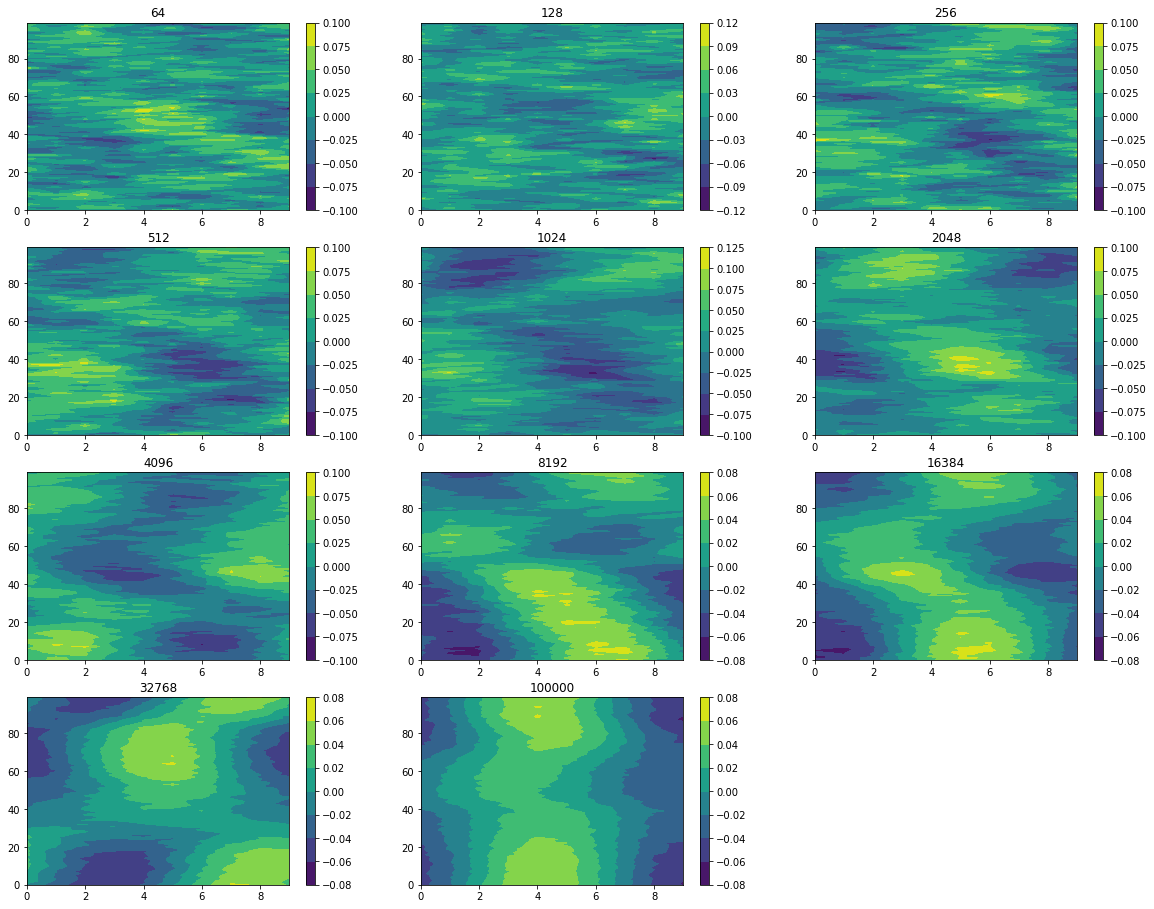

In [42]:
plt.figure(figsize=(20,20))
for i in range(len(Num_configs)):
    plt.subplot(5,3,i+1)
    plt.contourf(np.reshape(topEVec[i],[100,10],order='C'),aspect='auto')
    plt.title(np.array2string(Num_configs[i]))
    plt.colorbar()

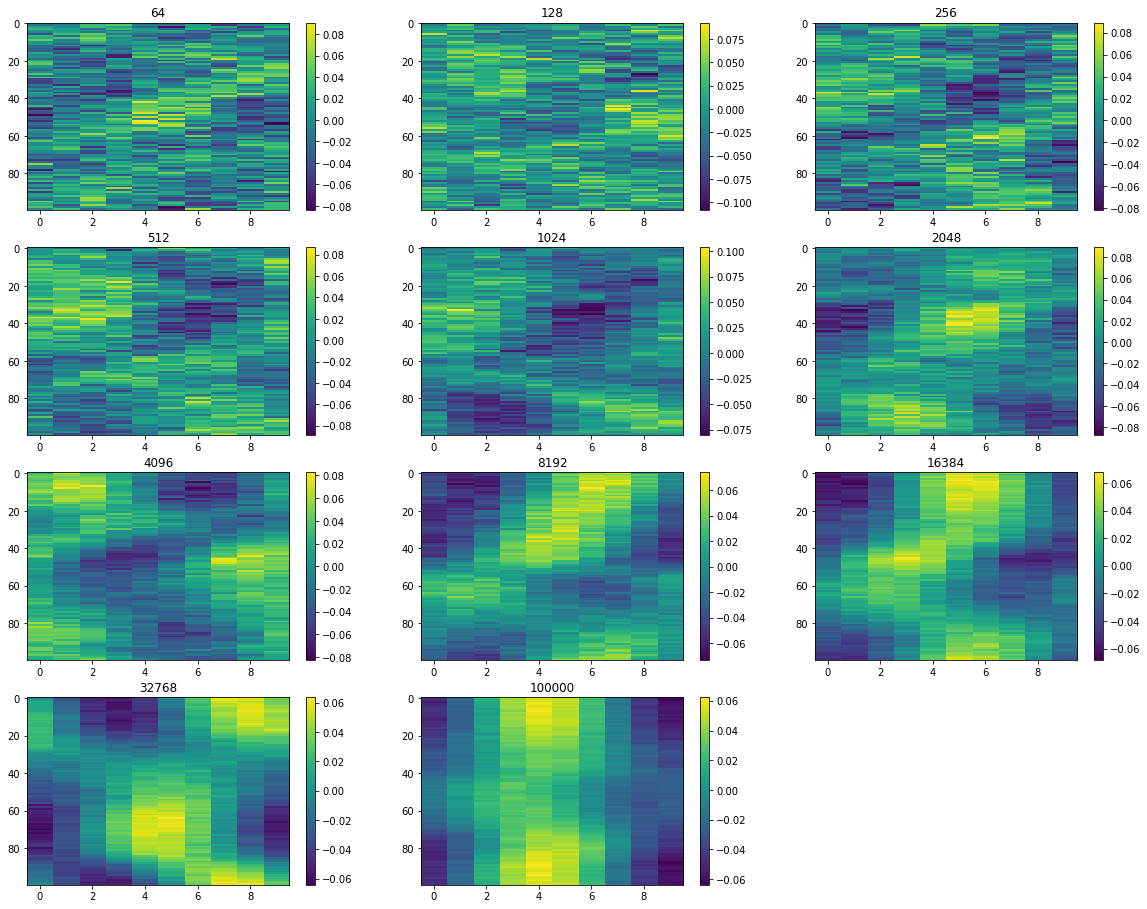

In [43]:
plt.figure(figsize=(20,20))
for i in range(len(Num_configs)):
    plt.subplot(5,3,i+1)
    plt.imshow(np.reshape(topEVec[i],[100,10],order='C'),aspect='auto')
    plt.title(np.array2string(Num_configs[i]))
    plt.colorbar()

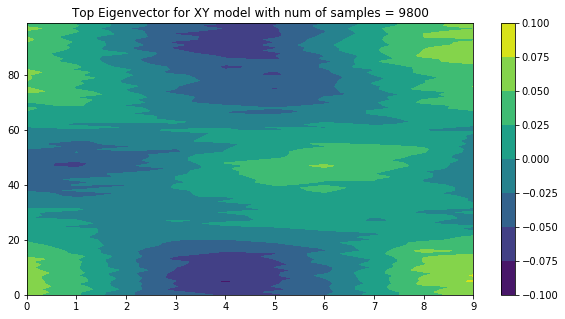

In [514]:
plt.figure(figsize=(10,5))
plt.contourf(np.roll(np.reshape(covMATEVEC[-1],[100,10],order='C'),0,axis=0))
plt.title('Top Eigenvector for XY model with num of samples = '+ str(Num_configs[-1]))
plt.colorbar()

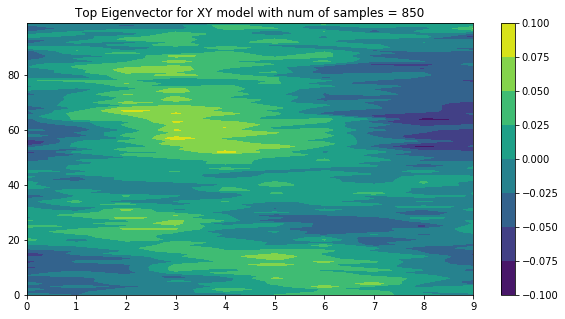

In [516]:
plt.figure(figsize=(10,5))
plt.contourf(np.roll(np.reshape(covMATEVEC[15],[100,10],order='C'),0,axis=0))
plt.title('Top Eigenvector for XY model with num of samples = '+ str(Num_configs[15]))
plt.colorbar()